##### Sobre o dataset

'O conjunto de dados flor Iris ou conjunto de dados Iris de Fisher é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos, como um exemplo de análise discriminante linear. (...)

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.' ([fonte](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris))

Estamos usando no presente exemplo, o conjunto de dados relativos às alturas e larguras de 150 de pétalas e sépalas de espécimes de plantas Íris. Cada espécime tem uma classificação ["Setosa", "Versicolor", "Virginica"] para a combinação de valores dos atributos ["sepal.length", "sepal.width", "petal.length", "petal.width", "variety"] que temos no dataset.

Então, a ideia é treinar um modelo que consigo realizar a previsão da categoria da planta (classificação) a partir de valores para os atributos ditos acima que caracterizam o espécime.

##### Começando!

Imports utilizados:

In [12]:
# imports utilizados aqui
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

Caminho para local em que está o dataset:

In [13]:
# capturando o caminho do presente arquivo e unindo ao caminho para o dataset
iris_path = os.path.join("datasets", "iris-dataset") # datasets\iris-dataset
iris_path = '..\\' + iris_path                       # ..\datasets\iris-dataset
csv_path = os.path.join(iris_path, "iris.csv")       # caminho para o .csv
iris = pd.read_csv(csv_path)                         # leitura do dataset
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


##### Visão geral dos dados que temos no dataset

In [14]:
iris.head() # primeiros 5 elementos do dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
iris.dtypes # tipo dos valores de cada um dos atributos

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [16]:
iris.info() # exibe atributos, contagem dos valores não nulos e tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
# quantidade, média, desvio padrão, mínimo, máximo e outros dados sobre valores numéricos dos atributos
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris['variety'].value_counts() # quantidade de instâncias de cada categoria do atributo variety

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

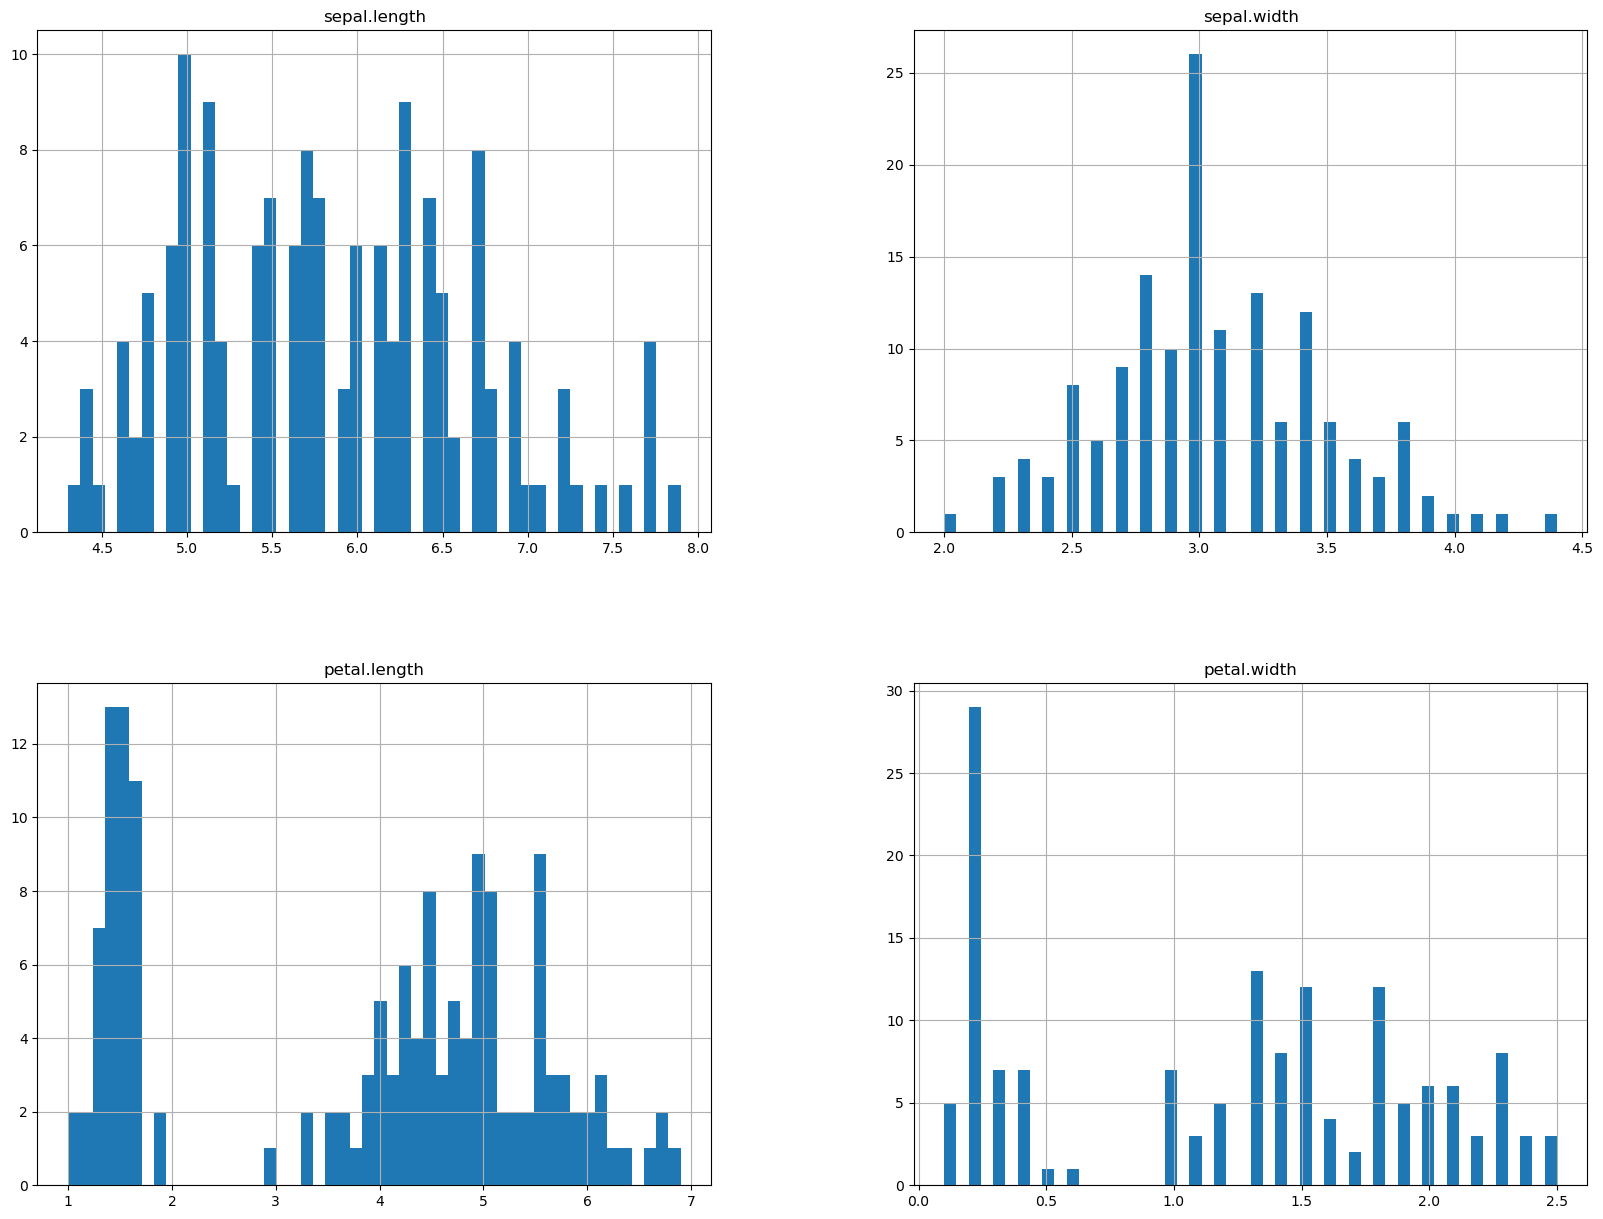

'\npodemos ver que os valores nos atributos são próximos, isto é, estão na mesma escala e não precisam, então\nser redimensionados para terem números mais próximos (escalas diferentes, como 10 e 10000000, afetam o \nfuncionamento do algoritmo, que não consegue lidar bem com valores assim)\n'

In [23]:
%matplotlib inline
# quantidade de instâncias para cada valor numérico
iris.hist(bins=50, figsize=(20,15))
plt.show()

Podemos ver na Figura acima que os valores nos atributos são próximos, isto é, estão na mesma escala e não precisam, então ser redimensionados para terem números mais próximos (escalas diferentes, como 10 e 10000000, afetam o funcionamento do algoritmo, que não consegue lidar bem com valores assim).

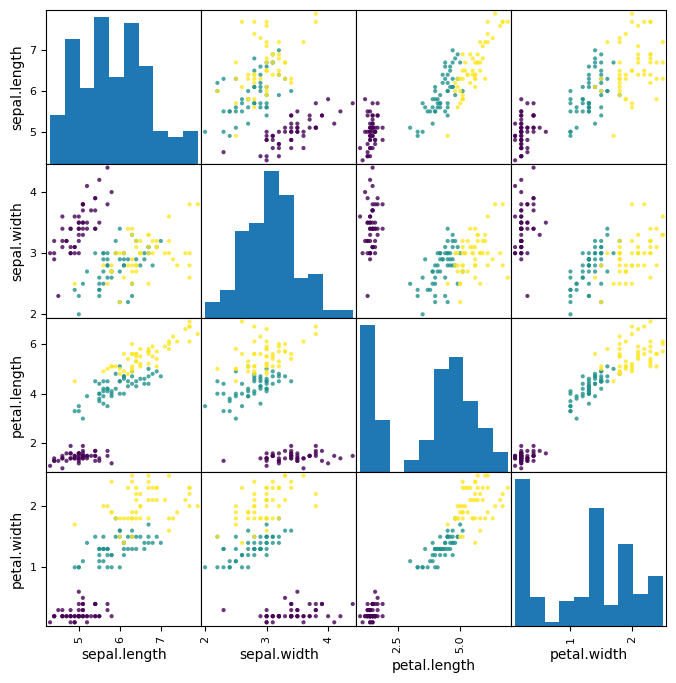

In [54]:
scatter_matrix(iris, alpha=0.8, c=pd.factorize(iris['variety'])[0], figsize=(8, 8), label=pd.factorize(iris['variety'])[0])
plt.show()

Podemos ver na Figura acima os gráficos de correlação com os pontos agrupados para cada tipo de planta em variety.

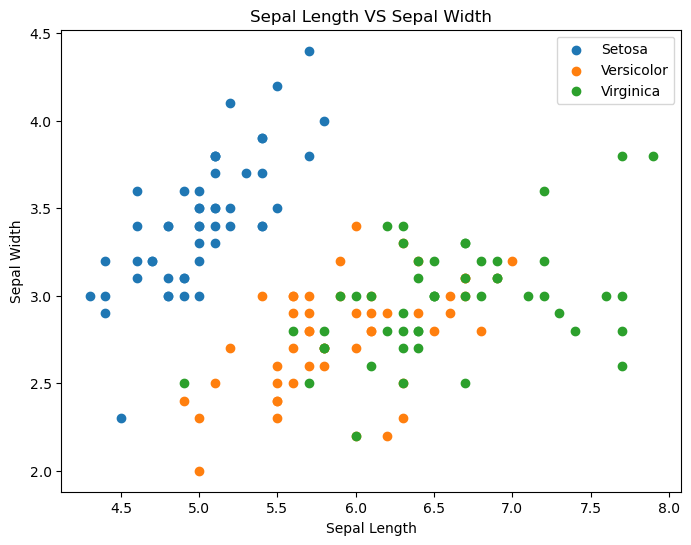

In [55]:
fig, ax = plt.subplots(figsize=(8, 6)) # figura (fig) e eixos (ax)

# iterando sobre cada instância do DataFrame
for types_in_variety, group in iris.groupby('variety'): # agrupamos pelos valores do atributo variety
  ax.scatter(group["sepal.length"], group["sepal.width"], label=types_in_variety)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Sepal Length VS Sepal Width")
ax.legend()

plt.show()

<Axes: >

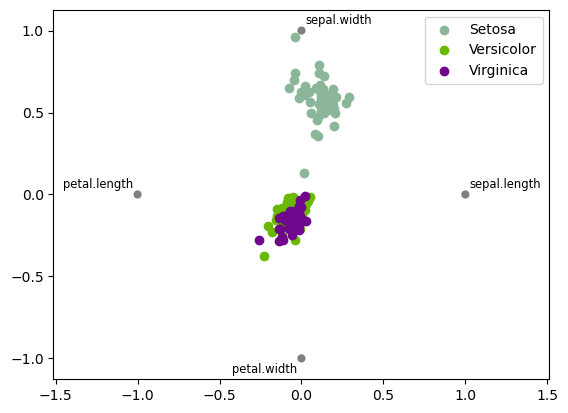

In [57]:
radviz(iris, "variety")

Vemos acima, de forma mais clara, a forma como os valores de sepal.length e sepal.width se relacionam; vemos também as cores para cada um dos tipo do atributo variety (setosa, versicolor, virginica).

Com os gráficos scatter mostrado anteriormente, conseguimos ver que as características que definem a planta Iris do tipo Setosa são bastante claras, sempre estando bem definidas e separadas das outras nos gráficos; diferentemente, os outros dois tipos chegam a se confundir nos gráficos, tendo características e valores bastante próximos (isso adianta que pode haver alguma dificuldade em alguns momentos para o modelo conseguir distinguir com precisão os tipos Versicolor e Virginica).

##### Treinando o modelo!

! Um detalhe importante é que não há necessidade de preparação dos dados, pois estes já estão prontos para serem levados ao treinamento do modelo. Isso porque não há necessidade de redimensionar, preencher/retirar valores faltantes, entre outras coisas importantes para a preparação de dados (e é importante perceber que isso raramente acontece!, a preparação sempre é uma etapa importante para que o modelo tenha dados adequados com os quais seja treinado e testado).

Agora, vamos separar diferentes conjuntos de dados para treinamento e para teste do modelo.

Faremos isso duas vezes: iremos separar usando um método de amostragem aleatória e depois, usaremos amostragem estratificada (a finalidade é comparar os resultados para esses diferentes métodos e verificar se há grandes diferenças de desempenho entre os dois métodos).

'Amostragem casual simples: Esse tipo de amostragem, também chamada simples ao acaso, aleatória, casual, simples, elementar, randômica, etc., é equivalente a um sorteio lotérico. Nela, todos os elementos da população têm igual probabilidade de pertencer à amostra, e todas as possíveis amostras têm também igual probabilidade de ocorrer. (...)

Amostragem estratificada: Muitas vezes a população se divide em subpopulações ou estratos, sendo razoável supor que, de estrato para estrato, a variável de interesse apresente um comportamento substancialmente diverso, tendo, entretanto, comportamento razoavelmente homogêneo dentro de cada estrato. Em tais casos, se o sorteio dos elementos da amostra for realizado sem se levar em consideração a existência dos estratos, pode acontecer que os diversos estratos não sejam convenientemente representados na amostra. (...)' ([fonte](https://www.ibilce.unesp.br/Home/Departamentos/CiencCompEstatistica/Adriana/formas-de-amostragem.pdf))

In [59]:
# amostragem aleatória
rand_train_set, rand_test_set = train_test_split(iris, test_size=0.2, random_state=42)

# amostragem estratificada

# gera divisões estratificadas nos dados
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# split.split(iris, iris["variety"]) - separa os índices de forma estratificada de acordo com a distribuição das categorias de variety
for train_index, test_index in split.split(iris, iris["variety"]):
  # para cada iteração, train_index contém os índices para o conjunto de treino e test_index contém os índices para o conjunto de teste
  strat_train_set = iris.loc[train_index]
  strat_test_set = iris.loc[test_index]
  # salvamos os conjuntos de treinamento e teste de forma estratificada

In [61]:
print(rand_train_set.head(5))
print()
print(rand_test_set.head(5))
print()
print(strat_train_set.head(5))
print()
print(strat_test_set.head(5))

    sepal.length  sepal.width  petal.length  petal.width     variety
22           4.6          3.6           1.0          0.2      Setosa
15           5.7          4.4           1.5          0.4      Setosa
65           6.7          3.1           4.4          1.4  Versicolor
11           4.8          3.4           1.6          0.2      Setosa
42           4.4          3.2           1.3          0.2      Setosa

     sepal.length  sepal.width  petal.length  petal.width     variety
73            6.1          2.8           4.7          1.2  Versicolor
18            5.7          3.8           1.7          0.3      Setosa
118           7.7          2.6           6.9          2.3   Virginica
78            6.0          2.9           4.5          1.5  Versicolor
76            6.8          2.8           4.8          1.4  Versicolor

     sepal.length  sepal.width  petal.length  petal.width     variety
8             4.4          2.9           1.4          0.2      Setosa
106           4.9       

Agora, vamos treinar diferentes modelos.

Fontes úteis para os gráficos e para a parte de análise dos dados do dataset: livro ['Mãos à Obra - Aprendizado de Máquina com Scikit-Learn e TensorFlow'](https://www.google.com/search?q=Mãos+à+Obra+-+Aprendizado+de+Máquina&client=opera-gx&sca_esv=585139827&ei=YTlhZaydFYKz1sQP76qzuA8&ved=0ahUKEwjs0bau7N2CAxWCmZUCHW_VDPcQ4dUDCA8&uact=5&oq=Mãos+à+Obra+-+Aprendizado+de+Máquina&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ03Do29zIMOgIE9icmEgLSBBcHJlbmRpemFkbyBkZSBNw6FxdWluYTIGEAAYFhgeMgYQABgWGB4yCBAAGBYYHhgKMgYQABgWGB5IuwVQXVhdcAF4AZABAJgB0QGgAdEBqgEDMi0xuAEDyAEA-AEB-AECqAIUwgITEAAYgAQYigUY6gIYtAIYQ9gBAcICFhAAGAMYjwEY5QIY6gIYtAIYjAPYAQLCAhYQLhgDGI8BGOUCGOoCGLQCGIwD2AEC4gMEGAAgQYgGAboGBAgBGAe6BgYIAhABGAo&sclient=gws-wiz-serp), [Ben Hamner - Kaggler](https://www.kaggle.com/code/benhamner/python-data-visualizations).